# テスト

- 2024/08/26: モヤモヤするが、何かはできている感じ

In [146]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [147]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

data = np.array([
    [166.0, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1],
])

x = data[:, 0]
y = data[:, 1]

inputs = torch.tensor((x - x.min()) / (x.max() - x.min())).float()
labels = torch.tensor((y - y.min()) / (y.max() - y.min())).float()
n_input = 5
n_output = 5
net = Net(n_input, n_output)

outputs = net(inputs)

In [148]:
for param in net.named_parameters():
    print(param)

('l1.weight', Parameter containing:
tensor([[-0.4269,  0.4116,  0.0283,  0.4004,  0.0494],
        [-0.3792,  0.1079,  0.3455, -0.1936,  0.2449],
        [ 0.0415,  0.0515, -0.3252,  0.2856,  0.1912],
        [ 0.2586, -0.2060, -0.2217,  0.3752,  0.2147],
        [-0.1050,  0.2324, -0.2460, -0.3185, -0.0295]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([-0.0904,  0.3929, -0.3925, -0.1861,  0.3243], requires_grad=True))


In [149]:
criterion = nn.MSELoss()
loss = criterion(outputs, labels)
loss.backward()


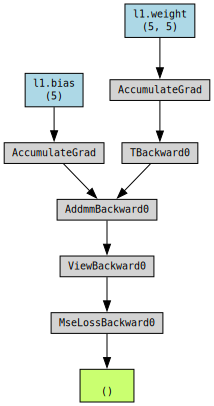

In [150]:
import torch.optim as optim
from torchviz import make_dot

lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [151]:
optimizer.step()
optimizer.zero_grad()

In [152]:
num_epochs = 500

history = np.array((0, 2))
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels) / 2.0
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch / Loss = {epoch} / {loss.item():.3f}')


Epoch / Loss = 0 / 0.151
Epoch / Loss = 100 / 0.134
Epoch / Loss = 200 / 0.120
Epoch / Loss = 300 / 0.107
Epoch / Loss = 400 / 0.096


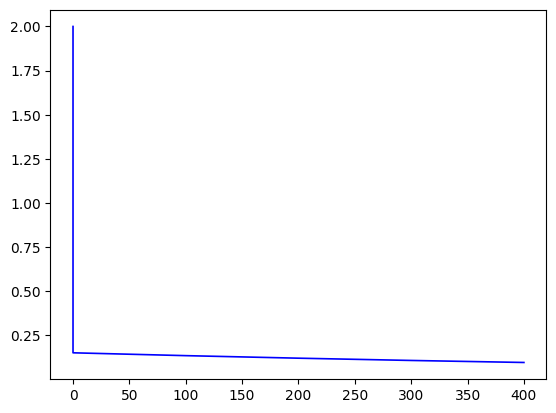

In [153]:
plt.plot(history[:, 0], history[:, 1], 'b')

In [154]:
print(f'{net.l1.weight} / {net.l1.bias}')

Parameter containing:
tensor([[-0.4269,  0.3565,  0.0007,  0.3618,  0.0329],
        [-0.3792,  0.1418,  0.3625, -0.1698,  0.2551],
        [ 0.0415,  0.0905, -0.3057,  0.3129,  0.2029],
        [ 0.2586, -0.1305, -0.1839,  0.4281,  0.2374],
        [-0.1050,  0.2219, -0.2512, -0.3258, -0.0326]], requires_grad=True) / Parameter containing:
tensor([-0.1455,  0.4268, -0.3534, -0.1106,  0.3138], requires_grad=True)


In [158]:
ans = net.l1.weight @ inputs + net.l1.bias

#plt.scatter(inputs.data.numpy(), ans.data.numpy(), 'r')
print(inputs)
print(labels)
print(ans)

tensor([0.0000, 1.0000, 0.5000, 0.7000, 0.3000])
tensor([0.0000, 1.0000, 0.2000, 0.6882, 0.0824])
tensor([ 0.4745,  0.7076, -0.1359,  0.0379,  0.1723], grad_fn=<AddBackward0>)


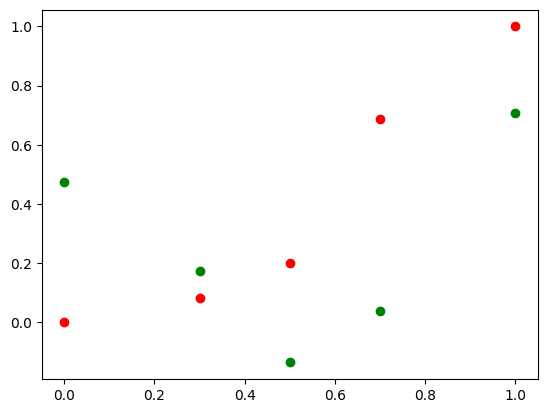

In [165]:
plt.scatter(inputs.data.numpy(), labels.data.numpy())
plt.scatter(inputs.data.numpy(), ans.data.numpy())